In [4]:
!pip uninstall opencv-python -y
# downgrade OpenCV a bit since some none-free features are not avilable
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

  Using cached https://files.pythonhosted.org/packages/61/29/fc60b2de1713aa92946992544329f20ccb5e4ba26290f403e04b7da44105/opencv_contrib_python-3.4.2.17-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/07/08/a549ba8b061005bb629b76adc000f3caaaf881028b963c2e18f811c6edc1/numpy-1.18.2-cp36-cp36m-manylinux1_x86_64.whl
ERROR: imgaug 0.2.9 requires opencv-python, which is not installed.
ERROR: dopamine-rl 1.0.5 requires opencv-python>=3.4.1.15, which is not installed.
ERROR: albumentations 0.1.12 requires opencv-python, which is not installed.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.2
    Uninstalling numpy-1.18.2:
      Successfully uninstalled numpy-1.18.2
  Found existing installation: opencv-contrib-python 3.4.2.17
    Unins

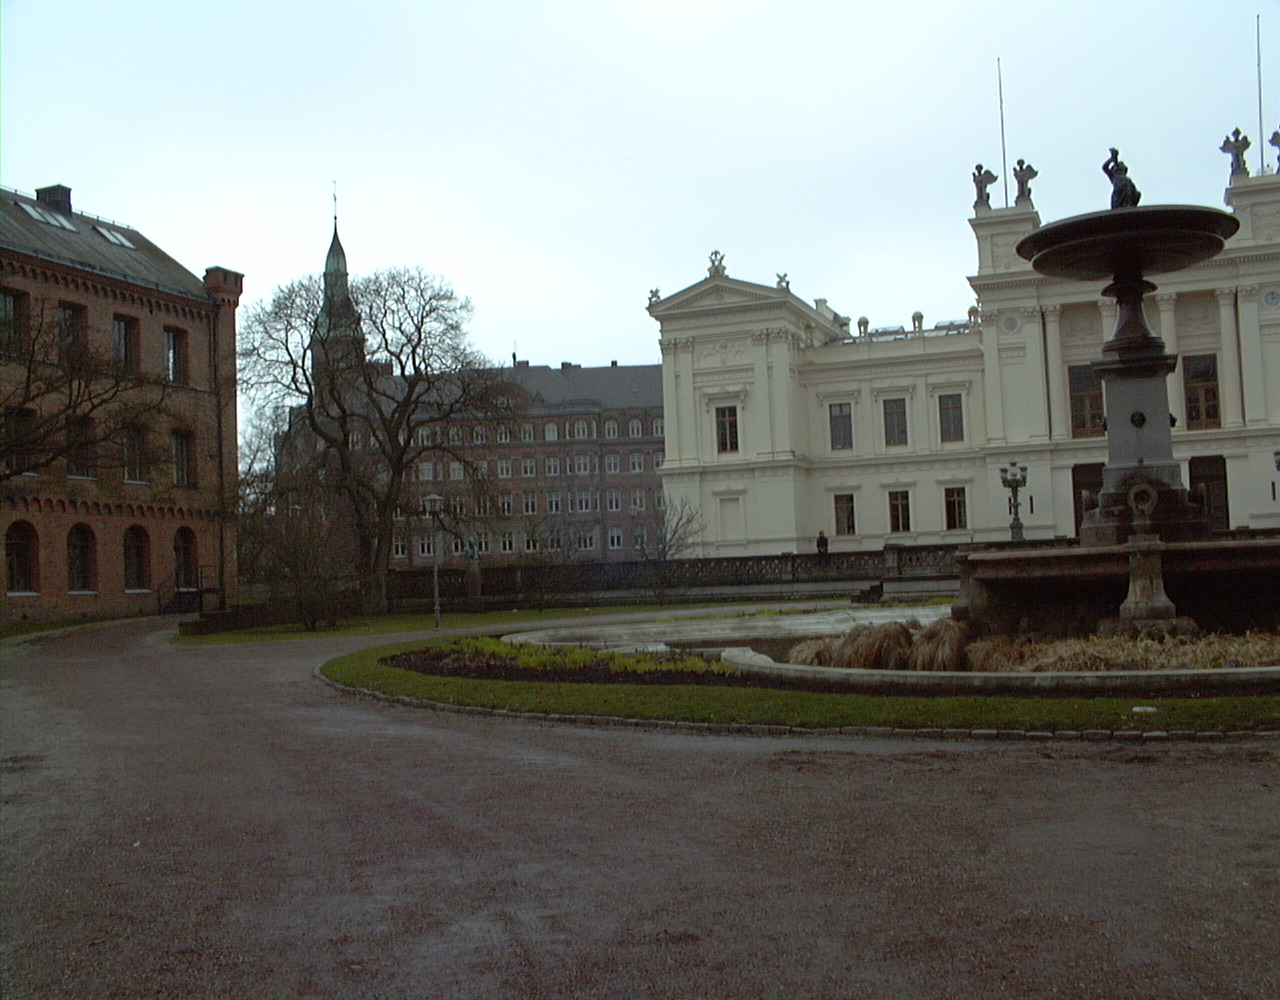

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from urllib.request import urlopen 
import numpy as np

img_left = cv.imread('Univ4.jpg', -1)
cv2_imshow(img_left)

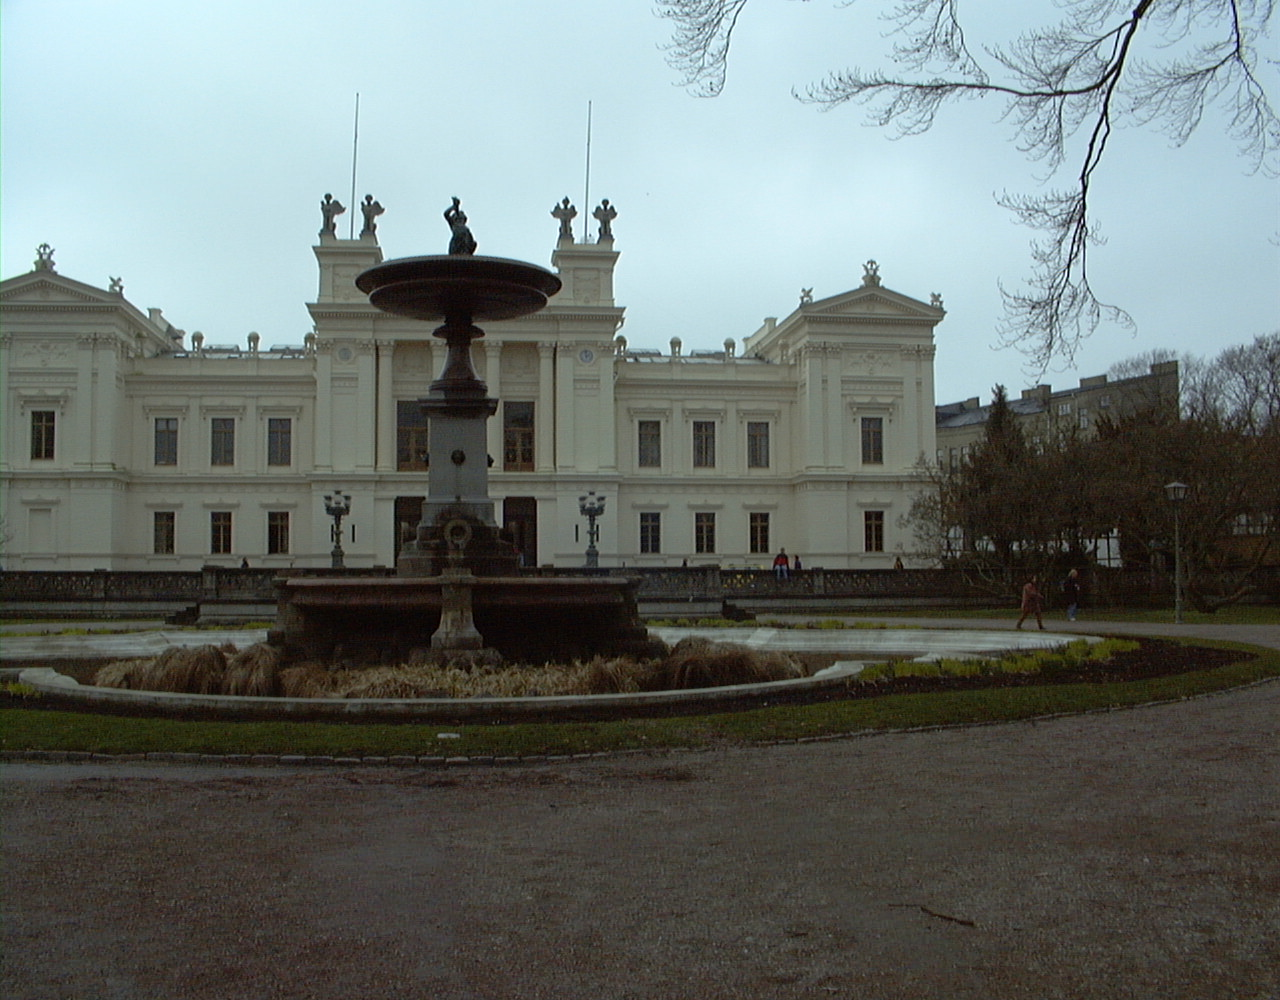

In [6]:
img_right = cv.imread('Univ3.jpg', -1)
cv2_imshow(img_right)

In [0]:
# sift
sift = cv.xfeatures2d.SIFT_create()
# find key points
kp1, des1 = sift.detectAndCompute(img_right, None)
kp2, des2 = sift.detectAndCompute(img_left, None)

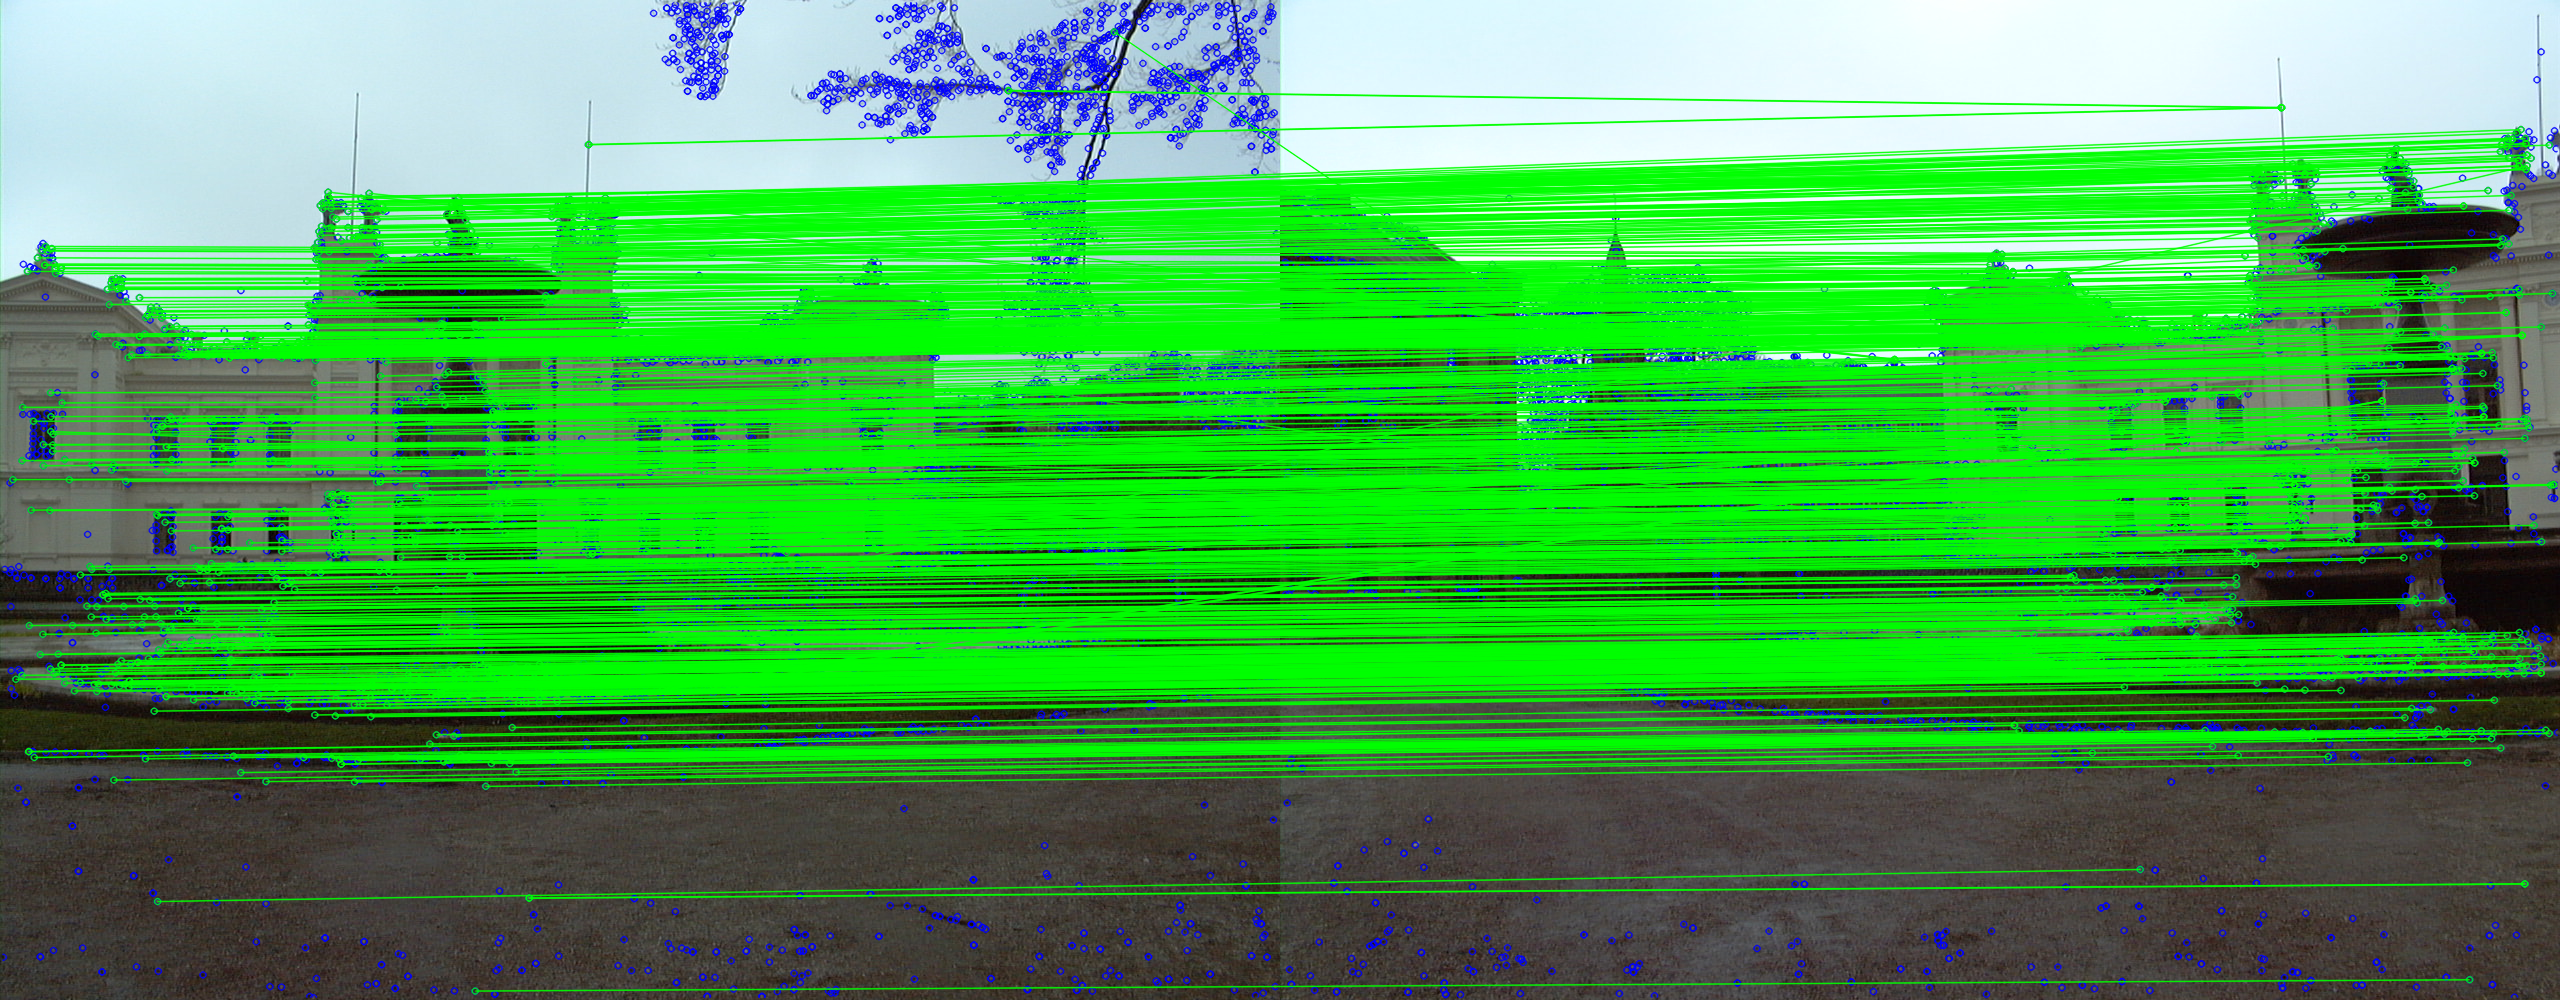

In [8]:
# brute force matching
match = cv.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
matches_img = cv.drawMatchesKnn(img_right,kp1,img_left,kp2,matches,None,**draw_params)
cv2_imshow(matches_img)